Copyright 2022 Dale Bowman, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Measures of association

Often when working on a data science project, interest is in deciding whether two variables (features) are related.
In this notebook we will discover some of the ways we can measure the association between two variables.
As before, the type of variable we have, either categorical (nominal or ordinal level of measure) or numerical (interval/ratio level) will determine the procedures we can use to identify associations between variables.

## What you will learn

In this notebook you will learn about measures of association between variables in order to understand the relationships between them.  We will study the following:

- Pearson’s correlation coefficient
- Spearman’s rank correlation coefficient
- Contingency tables
- Phi coefficient

## When to compute measures of association

Exploring the relationship between variables is useful when you want to know which variables are related to each other and what type of relationship they have.  For numerical variables, we can compute a correlation coefficient to help measure the strength of a linear relationship.  For categorical variables we can construct a contingency table to determine whether variables are independent.

## Correlation

### Numerical Data

For numerical data the most common measure of association is *Pearson’s correlation coefficient*, used to measure *linear* relationships between two variables.

A scatterplot of the variables can be used to see whether there is a possible relationship and whether it is linear.
If we let ${\mbox{$X_1, X_2, \ldots, X_n$}}$ and $Y_1, Y_2, \ldots, Y_n$ be the two sets of variables which are assumed to be random samples from two different populations, then Pearson’s correlation coefficient is defined as: 

$$r=\frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n(X_i - \bar{X})^2}\sqrt{\sum_{i=1}^n (Y_i - \bar{Y})^2}}$$ 

where $\bar{X}$ and $\bar{Y}$ are the sample means from each sample.
We can show that $r$ will always be between $-1$ and $1$ and we can use the value to explain the relationship between the two variables.
For values of $r>0$ we say the variables are *positively correlated*.
For values of $r<0$ the variables are deemed *negatively correlated*.
If $r=0$ there is no linear relationship between the two variables.
If $r=1$ or $-1$, there is a perfect linear relationship between the two.
The figures below show cases of positive, negative, and no correlation.
Figure 1 shows two variables that have a fairly high positive correlation of $r=0.
79$.
Figure 2 shows two variables with a negative correlation of $r=-0.
87$.
In Figure 3 we see two variables that have no linear relationship between them according to the scatterplot.
The estimated correlation should be close to zero and Pearson’s correlation coefficient was $0.11$.

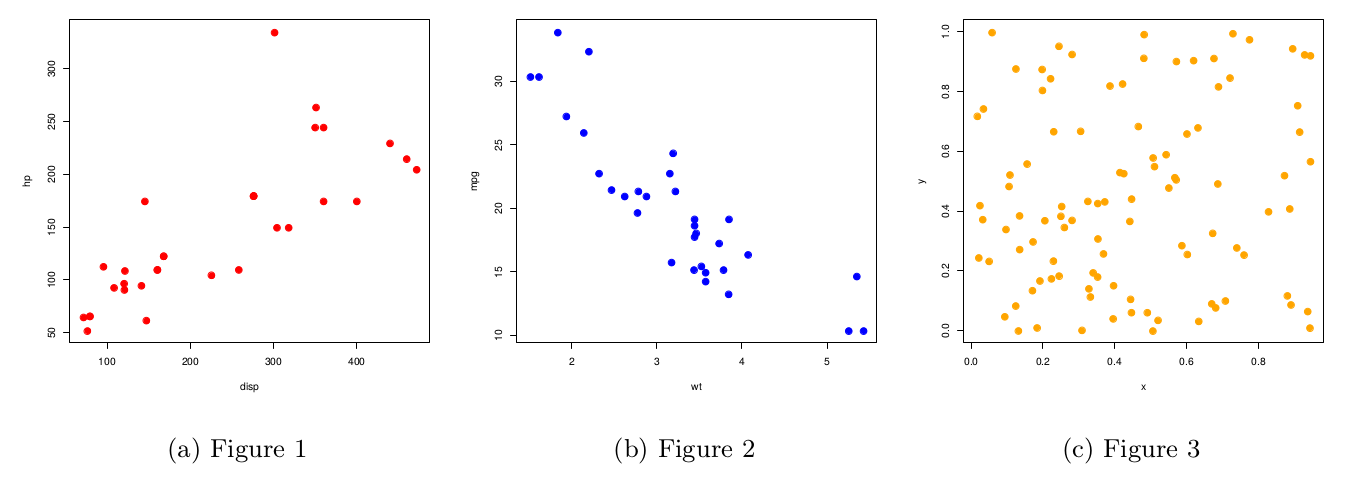

Let's take a look at correlations in the now-familiar, `iris` dataset.
First, we need to load `readr` so we can read the data file:

- `library readr`

In [1]:
library(readr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="?X}x;aWQY}Jg{bpdIQ`F">readr</variable></variables><block type="import_R" id="`I32oYXGa6d5*xF?Q|bo" x="16" y="10"><field name="libraryName" id="?X}x;aWQY}Jg{bpdIQ`F">readr</field></block></xml>

Now load the `iris` dataset into a dataframe variable:

- Set `dataframe` to `with readr do read_csv 
    - using `"datasets/iris.csv"`
- `dataframe` (so you can see the dataframe displayed)

In [2]:
dataframe = readr::read_csv("datasets/iris.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="!m][%?H-Yr,.F_SCv,^9">dataframe</variable><variable id="?X}x;aWQY}Jg{bpdIQ`F">readr</variable></variables><block type="variables_set" id="QprsrLvZ_G:y4$!@2*d#" x="14" y="200"><field name="VAR" id="!m][%?H-Yr,.F_SCv,^9">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id="Vlve5LFZN={Wl--YH)%L"><mutation items="1"></mutation><field name="VAR" id="?X}x;aWQY}Jg{bpdIQ`F">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="HyH?(x3/MuPXE`T5;)[@"><field name="TEXT">datasets/iris.csv</field></block></value></block></value></block><block type="variables_get" id="8~]Fa,S{rS(6g?GWMb|m" x="8" y="300"><field name="VAR" id="!m][%?H-Yr,.F_SCv,^9">dataframe</field></block></xml>

Rows: 150 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (4): SepalLength, SepalWidth, PetalLength, PetalWidth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SepalLength,SepalWidth,PetalLength,PetalWidth,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
⋮,⋮,⋮,⋮,⋮
6.7,3.0,5.2,2.3,virginica
6.3,2.5,5.0,1.9,virginica
6.5,3.0,5.2,2.0,virginica


As you can see, the `iris` dataset has five variables:

| Variable    | Type    | Description           |
|:-------------|:---------|:-----------------------|
| SepalLength | Ratio   | the sepal length (cm) |
| SepalWidth  | Ratio   | the sepal width (cm)  |
| PetalLength | Ratio   | the petal length (cm) |
| PetalWidth  | Ratio   | the petal width (cm)  |
| Species     | Nominal | the flower species    |

<div style="text-align:center;font-size: smaller">
 <b>Source:</b> This dataset was taken from the <a href="https://archive.ics.uci.edu/ml/datasets/iris">UCI Machine Learning Repository library
    </a></div>
<br>

Now that we have the `dataframe`, we can calculate correlations.
The first step is to load packages.
We need `corrr` to do the correlation, but we also need `dplyr` to drop the Species column, since correlation isn't defined for nominal variables:

- `library corrr`
- `library dplyr`

In [15]:
library(corrr)
library(dplyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="=-umBALRRqXC]aF/c{jh">dplyr</variable></variables><block type="import_R" id="a2?!Z]1e21Tty]!;ZS($" x="-57" y="4"><field name="libraryName" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><next><block type="import_R" id="XSWE]w}V:3hQE(O`y_E,"><field name="libraryName" id="=-umBALRRqXC]aF/c{jh">dplyr</field></block></next></block></xml>

We can drop Species using the `-` syntax of `select`, where minus means "everything but".
Then we can create a correlation matrix without this column:

- Set `df2` to `with dataframe do select`
    - using `dataframe`
    - and `-Species`
- Set `corrMatrix` to `with corrr do correlate`
    - using `df2`
- `corrMatrix` (so you can see the matrix displayed)

In [16]:
df2 = dplyr::select(dataframe,-Species)
corrMatrix = corrr::correlate(df2)

corrMatrix

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3jTyBF4WwQgjjOTZD5a@">df2</variable><variable id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</variable><variable id="=-umBALRRqXC]aF/c{jh">dplyr</variable><variable id="!m][%?H-Yr,.F_SCv,^9">dataframe</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable></variables><block type="variables_set" id=":21@s8fk~gstiQ+Ozbgi" x="-76" y="155"><field name="VAR" id="3jTyBF4WwQgjjOTZD5a@">df2</field><value name="VALUE"><block type="varDoMethod_R" id="M=4Q/U!Eh3,bNeun{Bhb"><mutation items="2"></mutation><field name="VAR" id="=-umBALRRqXC]aF/c{jh">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="variables_get" id="Z!7R.bFhla?_Yus.J`Nx"><field name="VAR" id="!m][%?H-Yr,.F_SCv,^9">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="b$D7kDw3U+qqR)$W}fHJ"><field name="CODE">-Species</field></block></value></block></value><next><block type="variables_set" id="A.J#qBRkNoK4quA/Z719"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field><value name="VALUE"><block type="varDoMethod_R" id="Aex0(X^q@_8)|kHv^W-h"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">correlate</field><data>corrr:correlate</data><value name="ADD0"><block type="variables_get" id="4:nm7IdTi(mV8Gj$t)q`"><field name="VAR" id="3jTyBF4WwQgjjOTZD5a@">df2</field></block></value></block></value></block></next></block><block type="variables_get" id="fv,]fGuHkW/}[~K_O3Oq" x="-74" y="350"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field></block></xml>

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,SepalLength,SepalWidth,PetalLength,PetalWidth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SepalLength,NA,-0.1093692,0.8717542,0.8179536
SepalWidth,-0.1093692,NA,-0.4205161,-0.3565441
PetalLength,0.8717542,-0.4205161,NA,0.9627571
PetalWidth,0.8179536,-0.3565441,0.9627571,NA


Notice that we had to create `df2` along the way to hold the result of the previous step.
You can imagine that if we had more steps, we'd need to create additional temporary variables to hold intermediate results.

We can accomplish the same goal more efficiently using `dplyr`'s pipe syntax.
In the pipe syntax, what is in the first stage is run through the second stage, and then the output of the second stage is run through the third stage, and so on:

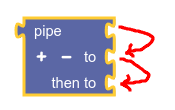

In our case, we start with a dataframe, drop a column, and then make the correlation matrix.
This way we can save the output of the last stage in a variable and avoid temporary variables.
Let's try it:

- Set `corrMatrix` to pipe 
    - `dataframe` 
    - to with `dplyr` do `select` 
        - using `-Species`
    - then to with `corrr` do `correlate`
- `corrMatrix` (so you can see the matrix displayed)

*Hint: `pipe` is in SPECIAL. It only appears if `dplyr` has been loaded.*

In [17]:
corrMatrix = dataframe %>%
    dplyr::select(-Species) %>%
    corrr::correlate()

corrMatrix

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</variable><variable id="!m][%?H-Yr,.F_SCv,^9">dataframe</variable><variable id="=-umBALRRqXC]aF/c{jh">dplyr</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable></variables><block type="variables_set" id=":21@s8fk~gstiQ+Ozbgi" x="-99" y="164"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field><value name="VALUE"><block type="pipe_R" id=":hd~=%M6g7kUpH5wdjvt"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="Z!7R.bFhla?_Yus.J`Nx"><field name="VAR" id="!m][%?H-Yr,.F_SCv,^9">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="M=4Q/U!Eh3,bNeun{Bhb"><mutation items="1"></mutation><field name="VAR" id="=-umBALRRqXC]aF/c{jh">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="b$D7kDw3U+qqR)$W}fHJ"><field name="CODE">-Species</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="Aex0(X^q@_8)|kHv^W-h"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">correlate</field><data>corrr:correlate</data></block></value></block></value></block><block type="variables_get" id="fv,]fGuHkW/}[~K_O3Oq" x="-93" y="296"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field></block></xml>

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,SepalLength,SepalWidth,PetalLength,PetalWidth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SepalLength,NA,-0.1093692,0.8717542,0.8179536
SepalWidth,-0.1093692,NA,-0.4205161,-0.3565441
PetalLength,0.8717542,-0.4205161,NA,0.9627571
PetalWidth,0.8179536,-0.3565441,0.9627571,NA


If you compare to the previous cell, you'll see that the pipe saved us some additional clicks and blocks.
We'll use the pipe syntax where we can going forward.

Let's return the the correlation matrix.
Since we dropped `Species`, `corrMatrix` only contains correlations for numeric variables.
We will talk about measures of association for nominal variables in a moment.

Second, notice that entries on the top left to bottom right diagonal are all NA.
This is because every variable is perfectly correlated with itself by definition (correlation of 1.0), so the correlation isn't interesting.

Finally, notice that the triangle of entries below the diagonal (lower triangular matrix) and triangle of entries above the diagonal (upper triangular matrix) are mirror images of each other.
For that reason, you often see matrices like this with only the lower diagonal matrix, because the rest is redundant.

`PetalLength` and `PetalWidth` are almost perfectly *positively* correlated at .96, meaning that as one increases, the other increases by almost the same amount.

In contrast, both `PetalLength` and `PetalWidth` are each *negatively* correlated with `SepalWidth` at -.42 and -.36 respectively. 
So as `SepalWidth` increases, we expect `PetalLength` and `PetalWidth` to *decrease*.

Sometimes it can be useful to look at a correlation matrix as a plot instead of as a table of values, especially if you are mostly interested in positive/negative associations.
What we will do is convert the numbers into colors, such that purple is a negative correlation and yellow is a positive correlation.
This is also called a **heatmap**.

To display the correlation matrix as a heatmap, we just need `corrr` to display the `corrMatrix` we've already made:

- with `corrr` do `rplot` 
    - using `corrMatrix`

In [ ]:
corrr::rplot(corrMatrix)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</variable></variables><block type="varDoMethod_R" id="|M8DM]xCy`6T0bV1?R1K" x="145" y="-334"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rplot</field><data>corrr:rplot</data><value name="ADD0"><block type="variables_get" id="-vxK9zE!IU_i$Us@*8x!"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field></block></value></block></xml>

With a heatmap, its always important to look at the color that represents zero, which here is white. 
In this color scheme, any color close to blue is a strong positive correlation, and any color close to red is a strong negative correlation.

One problem with this plot is that the positive and negative correlations aren't grouped together, and the correlations are duplicated in the upper and lower triangular.
We can clean this up using `rearrange` to group positive/negative and `shave` to remove the upper triangular.
It's most convenient to do this with pipe syntax:

it's a little hard to interpret without labels for the variables.
We can get those by using `x` and `y` as we did last time - the difference is that `x` and `y` are now our axis labels.
Copy the `imshow` blocks above, click the cell below, and paste the blocks into the workspace on the left. 
Then make the following changes:

- `pipe`
    - `corrMatrix`
    - to with `corrr` do `rearrange`
    - then to with `corrr` do `shave`
    - then to with `corrr` do `rplot`


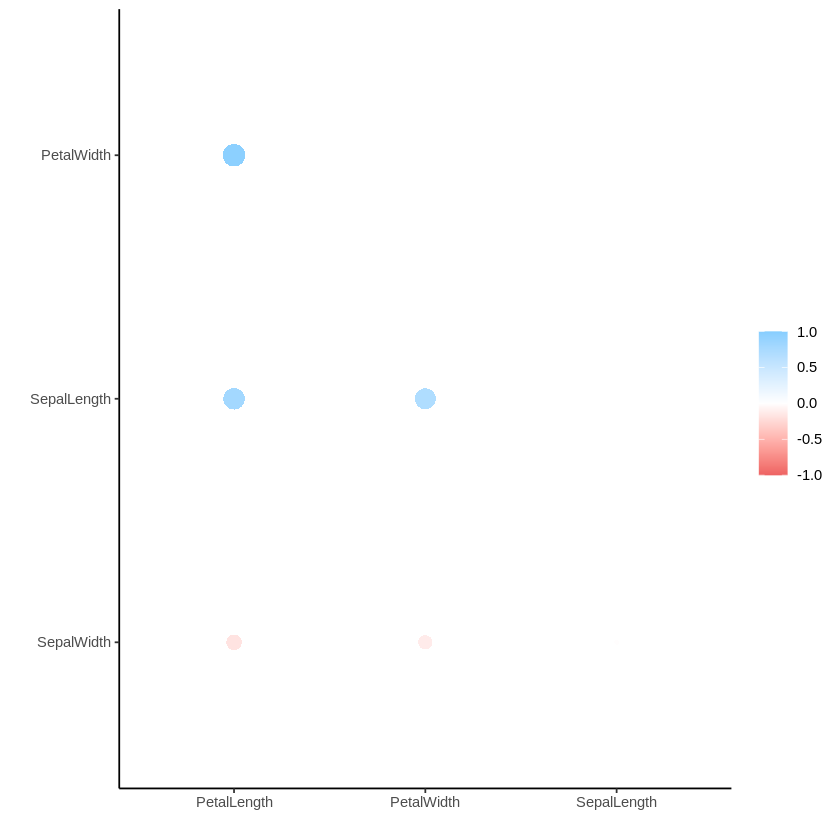

In [29]:
corrMatrix %>%
    corrr::rearrange() %>%
    corrr::shave() %>%
    corrr::rplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable></variables><block type="pipe_R" id="jI{JJE%`Lri!8Z9tiY6Y" x="-21" y="-271"><mutation items="3"></mutation><value name="INPUT"><block type="variables_get" id="-vxK9zE!IU_i$Us@*8x!"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="|M8DM]xCy`6T0bV1?R1K"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rearrange</field><data>corrr:rearrange</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="cu-?GG]G.HrY?/GyE~nE"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">shave</field><data>corrr:shave</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="j=a0p{j[O4)zBg1}J3K8"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rplot</field><data>corrr:rplot</data></block></value></block></xml>

Take a moment and visually compare the correlation matrix with this heatmap.
Do you think it's easier to see that `PetalLength` and `PetalWidth` are positively correlated and that both of these are negatively correlated with `SepalWidth`?

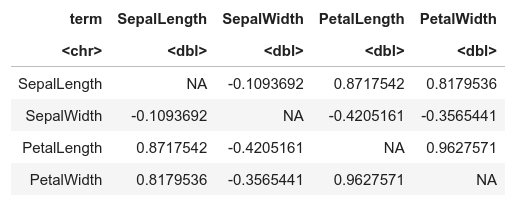

Let's keep going.

The value of $r$ can be close to zero if the relationship between the two variables is curved because *$r$ only measures linear relationships*.
For example the relationship $y=e^x$ is a perfect relationship between $Y$ and $X$ and yet it is not linear so the Pearson correlation coefficient will not be 1.
Correlation can also be close to zero if there are outliers in the data that are much different than the linear trend seen in the remaining data.
These anomalies illustrate the importance of always plotting the data first to be sure the relationship is linear.

It is also important to note that *correlation* does not imply *causation*.
Just because two variables are highly correlated does not mean there is a cause and effect relationship between them.
For example, significant correlation has been found between sunspot activity and economic cycles and yet it is not plausible to say that one causes the other.
There could also be lurking variables causing both variables to move in the same direction.
For example, a correlation can be found between the amount of ice cream sold and the number of people at the beach.
Neither causes each other but both are affected by the outside temperature.
Their relationship is illustrated in the figure below.

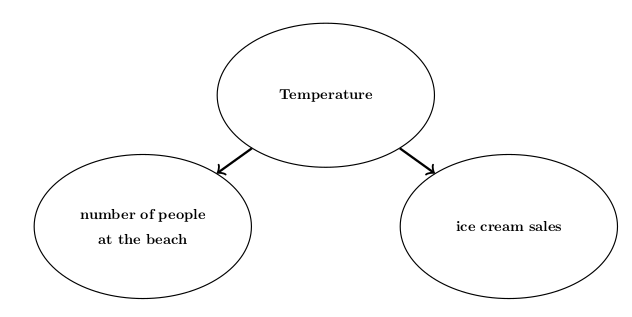

Remember that causality requires a counterfactual, which we typically create using a randomized experiment.
You can't establish causality with a correlation.

### Ordered Categorical Data

For ordered categorical data there are measures of correlation based on ranks.
In these methods the original variables are replaced by their *ranks*.
If we order the original sample from smallest to largest, then the rank $R_1$ corresponds to the smallest, rank $R_2$ is the next largest, etc.
*Spearman’s rank correlation coefficient* computes a measure of association using the ranks.
The method is to assign ranks to the $X$'s and $Y$'s separately and then computes Pearson’s correlation coefficient on the ranks.
Spearman’s correlation works for numerical data as well as ordinal data.
It can be interpreted in the same way as Pearson’s correlation.

We can get a Spearman correlation almost exactly the same with a Pearson correlation.
The only difference is that we need to tell `corr` what correlation to use (Pearson is the default):

- Set `corrMatrix` to pipe 
    - `dataframe` 
    - to with `dplyr` do `select` 
        - using `-Species`
    - then to with `corrr` do `correlate` 
        - using `method='spearman'`
- `corrMatrix` (so you can see the matrix displayed)

*Hint:  you can copy your blocks from a previous step.*

In [30]:
corrMatrix = dataframe %>%
    dplyr::select(-Species) %>%
    corrr::correlate(method='spearman')

corrMatrix

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</variable><variable id="!m][%?H-Yr,.F_SCv,^9">dataframe</variable><variable id="=-umBALRRqXC]aF/c{jh">dplyr</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable></variables><block type="variables_set" id=":21@s8fk~gstiQ+Ozbgi" x="-99" y="164"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field><value name="VALUE"><block type="pipe_R" id=":hd~=%M6g7kUpH5wdjvt"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="Z!7R.bFhla?_Yus.J`Nx"><field name="VAR" id="!m][%?H-Yr,.F_SCv,^9">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="M=4Q/U!Eh3,bNeun{Bhb"><mutation items="1"></mutation><field name="VAR" id="=-umBALRRqXC]aF/c{jh">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="b$D7kDw3U+qqR)$W}fHJ"><field name="CODE">-Species</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="Aex0(X^q@_8)|kHv^W-h"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">correlate</field><data>corrr:correlate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="WbfeGQej~$uS+PkQDry]"><field name="CODE">method='spearman'</field></block></value></block></value></block></value></block><block type="variables_get" id="fv,]fGuHkW/}[~K_O3Oq" x="-93" y="296"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field></block></xml>

Correlation computed with
• Method: 'spearman'
• Missing treated using: 'pairwise.complete.obs'


term,SepalLength,SepalWidth,PetalLength,PetalWidth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SepalLength,NA,-0.1594565,0.8813864,0.8344207
SepalWidth,-0.1594565,NA,-0.3034206,-0.2775111
PetalLength,0.8813864,-0.3034206,NA,0.9360034
PetalWidth,0.8344207,-0.2775111,0.9360034,NA


As you can see, the results are very similar to Pearson correlation in this case.

## Categorical Associations

Suppose we are interested in determining whether two categorical variables are related to each other.
We can construct a *contingency table* to divide the data into categories and count the frequency of observations that fall into each category.
Consider the case where each variable consists of only two possible outcomes.
For example suppose we are interested in determining whether attendance in a class is related to whether you pass or fail.
Then we can classify the students in the class into four cases:

1. Those who attended the class and passed
2. Those who attended the class and failed
3. Those who skipped class and passed
4. Those who skipped class and failed

The frequency of students in each of these four cases can be summarized in a $2 \times 2$ contingency table as shown below.

|          | Pass | Fail |
|----------|------|------|
| Attended | 25   | 5    |
| Skipped  | 5    | 10   |

To determine if there is a connection between passing/failing and attending/skipping, we need to see what our table would look like if there were no connection (called the *expected* table) and then see how different the expected table is from what we have (called the *observed* table).

In order to find the expected table, we need another table detailing the row sums and column sums, called *marginals*.

|          | Pass | Fail | Total |
|----------|------|------|-------|
| Attended | 25   | 5    | **30**    |
| Skipped  | 5    | 10   | **15**    |
| **Total**    | **30**   | **15**   | **45**    |

Consider the top left entry of the table.
Using the marginal totals we can say the probability of a student having attended the class is the total number of students who attended divided by the total number of students, 30/45.
The probability of the student passing the class is the total number of students who passed divided by the total number of students, also 30/45.
If there is no relationship between the row and column variables then the probability of a student attending class and passing the class (corresponding to the top left entry in the table) is the probability of attending times the probability of passing, or $(30/45)\times(30/45)=.44$.
Because there are 45 students total, we would expect the number of students in the top left cell to be 45 times the probabilit of being in this cell.
That is:

$$45 \times P(attending) \times P(passing) = 45 \times \left( \frac{30}{45} \right) \left( \frac{30}{45}\right)=20.
$$ 

We can repeat this process for every combination of row and column to get the *expected table* as shown below.

|          | Pass | Fail | Total |
|----------|------|------|-------|
| Attended | 20   | 10   | 30    |
| Skipped  | 10   | 5    | 15    |
| Total    | 30   | 15   | 45    |

We can compare difference in the two tables (observed and expected) by computing the *chi-square* statistic, $\chi^2$.
If $O$ stands for counts in the observed table and $E$ stands for counts in the expected table, then the chi-square statistic is found as $$\chi^2 = \sum \left(\frac{(O-E)^2}{E}\right)$$ 

where the sum is over the 4 cells in the contingency table.
For our example this would be 

$$\left( \frac{(25-20)^2}{20} \right) + \left(\frac{(5-10)^2}{10}\right) + \left( \frac{(5-10)^2}{10} \right)+\left( \frac{(10-5)^2}{5} \right) = 11.25.
$$  

The chi-square statistic can be used to test for whether the row and column variables are independent by comparing it to a chi-square distribution (hence the name) or it can be used to compute a single measure of association between the two variables.
One such measure for a $2 \times 2$ table is the *Phi coefficient* and is defined as 

$$\phi = \sqrt{\frac{\chi^2}{N}}$$

where $N$ is the total number of counts in the contingency table.
The measure ranges between 0 and 1 and higher values are associated with a stronger association.
The value of $\phi$ for our example is 

$$\phi = \sqrt{\frac{11.25}{45}}=0.5.$$ 

This is considered a strong association.
As a rule of thumb, values of $\phi$ below 0.10 are considered a weak association between the variables, values between 0.10 and 0.30 are considered a moderate association, and values above 0.30 are evidence of a strong association.

As per usual, we can get R to do all this work for us, as long as we know how to tell it.

Let's start with a new dataset that has some better categorical variables.
The dataset we will use is called `titanic` and is a list of passengers on the famous ship Titanic that sank over 100 years ago when it hit an iceberg.
The first step is to load the data:

- Set `dataframe` to `with readr do read_csv`
    - using "datasets/titanic.csv"`
- `dataframe` 

In [31]:
dataframe = readr::read_csv("datasets/titanic.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="!m][%?H-Yr,.F_SCv,^9">dataframe</variable><variable id="?X}x;aWQY}Jg{bpdIQ`F">readr</variable></variables><block type="variables_set" id="QprsrLvZ_G:y4$!@2*d#" x="14" y="200"><field name="VAR" id="!m][%?H-Yr,.F_SCv,^9">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id="Vlve5LFZN={Wl--YH)%L"><mutation items="1"></mutation><field name="VAR" id="?X}x;aWQY}Jg{bpdIQ`F">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="HyH?(x3/MuPXE`T5;)[@"><field name="TEXT">datasets/titanic.csv</field></block></value></block></value></block><block type="variables_get" id="8~]Fa,S{rS(6g?GWMb|m" x="8" y="300"><field name="VAR" id="!m][%?H-Yr,.F_SCv,^9">dataframe</field></block></xml>

Rows: 887 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Name, Sex
dbl (6): Survived, Pclass, Age, Siblings/Spouses Aboard, Parents/Children Ab...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
0,3,Mr. William Henry Allen,male,35,0,0,8.0500
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,2,Rev. Juozas Montvila,male,27,0,0,13.00
1,1,Miss. Margaret Edith Graham,female,19,0,0,30.00
0,3,Miss. Catherine Helen Johnston,female,7,1,2,23.45


The two variables we are interested in are `Survived` and `Sex`, because we wonder if men or women were more likely to survive.
Notice that `Survived` is either 1 or 0 - it is common to code a categorical variable this way when 1 is "true" and 0 is "false".
Even though `Survived` looks like a numeric variable, it is actually categorical.

Next we need to make a contingency table for these two variables.
The easiest way to do this is with the `janitor` library:

- `library janitor`

In [37]:
library(janitor)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":@-Dxs3C4/QA%Z*Y=Q#t">janitor</variable></variables><block type="import_R" id="|YO)KS3A)pn(fR*N^rI6" x="16" y="-324"><field name="libraryName" id=":@-Dxs3C4/QA%Z*Y=Q#t">janitor</field></block></xml>


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Now we can create the contingency table:

- Set `contingencyTable` to `with janitor do tabyl`
    - using `dataframe`
    - and `Survived,Sex`
- `contingencyTable` (for display)

In [39]:
contingencyTable = janitor::tabyl(dataframe,Survived,Sex)

contingencyTable

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A/nbv^PpLXR=]Uwz.K,x">contingencyTable</variable><variable id=":@-Dxs3C4/QA%Z*Y=Q#t">janitor</variable><variable id="!m][%?H-Yr,.F_SCv,^9">dataframe</variable></variables><block type="variables_set" id="KSW^`Tm0CC,Fct*,o(2{" x="-21" y="-175"><field name="VAR" id="A/nbv^PpLXR=]Uwz.K,x">contingencyTable</field><value name="VALUE"><block type="varDoMethod_R" id="24Se{uB3O+QpUclpSahN"><mutation items="2"></mutation><field name="VAR" id=":@-Dxs3C4/QA%Z*Y=Q#t">janitor</field><field name="MEMBER">tabyl</field><data>janitor:tabyl</data><value name="ADD0"><block type="variables_get" id="/1~nhSEuvI2IwGcMkJj$"><field name="VAR" id="!m][%?H-Yr,.F_SCv,^9">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="6tQp?tf0@$Kwq(;rQj6X"><field name="CODE">Survived,Sex</field></block></value></block></value></block><block type="variables_get" id="hpM`r#oKl,/6bp:FhDoJ" x="-28" y="-84"><field name="VAR" id="A/nbv^PpLXR=]Uwz.K,x">contingencyTable</field></block></xml>

Survived,female,male
<dbl>,<dbl>,<dbl>
0,81,464
1,233,109


Stop for a moment to consider what `tabyl` has done - it has gone through 886 rows of the dataframe and counted the number of time females survived, males survived, females died, and males died in order to make this table.

Next we need to calculate chi-square with `janitor`:

- `with janitor do chisq.test`
    - using `contingencyTable`

In [40]:
janitor::chisq.test(contingencyTable)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":@-Dxs3C4/QA%Z*Y=Q#t">janitor</variable><variable id="A/nbv^PpLXR=]Uwz.K,x">contingencyTable</variable></variables><block type="varDoMethod_R" id="#$?l(0+D.9.cMSzP$L3}" x="-28" y="-144"><mutation items="1"></mutation><field name="VAR" id=":@-Dxs3C4/QA%Z*Y=Q#t">janitor</field><field name="MEMBER">chisq.test</field><data>janitor:chisq.test</data><value name="ADD0"><block type="variables_get" id="3Jx-}tOGlZA]..3yu++c"><field name="VAR" id="A/nbv^PpLXR=]Uwz.K,x">contingencyTable</field></block></value></block></xml>


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingencyTable
X-squared = 258.39, df = 1, p-value < 2.2e-16


In this case, we just want the first number returned, 258.39, which is the chi-square value.
To finish calculating phi, all we need to do is divide 258.39 by 886 (the number of people) and take the square root:

- In menu MATH, get `1 + 1`, change the + to &#xF7; and then change the 1s to divide 258.39 by 886 
- In menu MATH, get the `square root` block and connect it to the front of the first block

In [41]:
sqrt(258.39 / 886)

#<xml xmlns="https://developers.google.com/blockly/xml"><block type="math_single" id="m+XWK.j{Ys+(56gT8$;R" x="-1" y="120"><field name="OP">ROOT</field><value name="NUM"><shadow type="math_number" id="PDsm*QP)jsd#BCD`Ogm["><field name="NUM">9</field></shadow><block type="math_arithmetic" id="Fgys`6oo8RWepr*.9qc?"><field name="OP">DIVIDE</field><value name="A"><shadow type="math_number" id="/{|4Kaj^?iWj]#4*4IqY"><field name="NUM">258.39</field></shadow></value><value name="B"><shadow type="math_number" id="tJ-03t`xtN3MD%{XsRd0"><field name="NUM">886</field></shadow></value></block></value></block></xml>

[1] 0.5400339

This is a pretty strong association and matches what we see in the contingency table:

- 233 females survived and 81 females died, so females were  about three times as likely to live as die
- 109 males survived and 464 males died, so males were over four times likely to die as to live

You may be curious about some of the other values returned by `chisq.test`.
As described in the [documentation](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/chisq.test.html), the other values are the p-value and the degrees of freedom.
Of these, the p-value is arguably the most important because it represents how likely we were to get values this different from the expected values just due to chance.
Typically values less that .05 are considered *statistically significant*, meaning that they would only occur randomly less than 5% of the time.

<!--  -->